In [1]:
import json, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path


In [3]:
DATA_PATH = Path("user-wallet-transactions.json")  

with DATA_PATH.open() as f:
    raw = json.load(f)

print("Rows:", len(raw))
print("First record:\n", json.dumps(raw[0], indent=2)[:600])


Rows: 100000
First record:
 {
  "_id": {
    "$oid": "681d38fed63812d4655f571a"
  },
  "userWallet": "0x00000000001accfa9cef68cf5371a23025b6d4b6",
  "network": "polygon",
  "protocol": "aave_v2",
  "txHash": "0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190",
  "logId": "0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190_Deposit",
  "timestamp": 1629178166,
  "blockNumber": 1629178166,
  "action": "deposit",
  "actionData": {
    "type": "Deposit",
    "amount": "2000000000",
    "assetSymbol": "USDC",
    "assetPriceUSD": "0.9938318274296357543568636362026045",
    "poolId": "0x2791bca1


In [4]:
df = pd.json_normalize(raw)

rename_map = {
    "userWallet": "wallet",
    "actionData.amount": "amount",
    "actionData.assetSymbol": "asset"
}
df = df.rename(columns=rename_map)

# timestamps from seconds → datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# amounts are big‑int strings; cast to float (or int)
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")

df.head()


,wallet,network,protocol,txHash,logId,timestamp,blockNumber,action,__v,_id.$oid,...,actionData.repayerId,actionData.liquidatorId,actionData.collateralAmount,actionData.collateralAssetPriceUSD,actionData.principalAmount,actionData.borrowAssetPriceUSD,actionData.collateralReserveId,actionData.collateralReserveSymbol,actionData.principalReserveId,actionData.principalReserveSymbol
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,0,681d38fed63812d4655f571a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,0,681aa70dd6df53021cc6f3c0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,0,681d04c2d63812d4654c733e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,0,681d133bd63812d46551b6ef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,0,681899e4ba49fc91cf2f4454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df["action"].value_counts())
print(df["asset"].value_counts().head())
df.describe(include="all").T


action
deposit             37808
redeemunderlying    32305
borrow              17086
repay               12553
liquidationcall       248
Name: count, dtype: int64
asset
USDC    29673
DAI     17689
USDT    16019
WETH    11619
WPOL     9254
Name: count, dtype: int64


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
wallet,100000,3497,0x05c9db563db8e38cc2899297da41ce430b61a484,14265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
network,100000,1,polygon,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protocol,100000,1,aave_v2,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txHash,100000,96707,0xed8fb7651426706ec1d67ac8572cba099f2c114ce843...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logId,100000,99213,0xed8fb7651426706ec1d67ac8572cba099f2c114ce843...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,100000,NaN,NaN,NaN,2021-06-17 00:55:30.034620160,2021-03-31 17:00:04,2021-05-21 08:21:36.500000,2021-06-11 12:43:53,2021-07-12 02:29:14,2021-09-02 17:54:35,NaN
blockNumber,100000.0,NaN,NaN,NaN,1623891330.03462,1617210004.0,1621585296.5,1623415433.0,1626056954.0,1630605275.0,3016213.79454
action,100000,5,deposit,37808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
__v,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_id.$oid,100000,100000,681d38fed63812d4655f571a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
g = df.groupby("wallet")

features = pd.DataFrame({
    "tx_count"           : g.size(),
    "total_deposit"      : g.apply(lambda x: x.loc[x.action=="deposit", "amount"].sum()),
    "total_borrow"       : g.apply(lambda x: x.loc[x.action=="borrow",  "amount"].sum()),
    "borrow_to_deposit"  : lambda d: d["total_borrow"] / (d["total_deposit"]+1e-6),
    "active_days"        : g.timestamp.apply(lambda s: s.dt.date.nunique()),
    "avg_time_between"   : g.timestamp.apply(lambda s: s.sort_values().diff().dt.total_seconds().mean()),
    "asset_diversity"    : g.asset.nunique(),
    "liquidations"       : g.apply(lambda x: (x.action=="liquidationcall").sum()),
})

features = features.reset_index().fillna(0)
features.head()


/var/folders/l1/8qqttn2s19s09t10504zkzlh0000gn/T/ipykernel_71167/1208951599.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  "total_deposit"      : g.apply(lambda x: x.loc[x.action=="deposit", "amount"].sum()),
/var/folders/l1/8qqttn2s19s09t10504zkzlh0000gn/T/ipykernel_71167/1208951599.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  "total_borrow"       : g.apply(lambda x: x.loc[x.action=="borrow",  

,wallet,tx_count,total_deposit,total_borrow,borrow_to_deposit,active_days,avg_time_between,asset_diversity,liquidations
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,2.000000e+09,0.000000e+00,<function <lambda> at 0x1043c4d60>,1,0.000000,1,0
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1.450000e+20,0.000000e+00,<function <lambda> at 0x1043c4d60>,1,0.000000,1,0
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,5.000000e+15,0.000000e+00,<function <lambda> at 0x1043c4d60>,2,654405.000000,1,0
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,0.000000e+00,0.000000e+00,<function <lambda> at 0x1043c4d60>,8,698369.937500,4,0
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,9.459366e+22,3.946000e+22,<function <lambda> at 0x1043c4d60>,104,28843.251256,6,0


In [7]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

num_cols = features.select_dtypes(np.number).columns
iso = IsolationForest(n_estimators=300, contamination=0.1, random_state=42)
iso.fit(features[num_cols])

# IsolationForest.decision_function ⇒ higher = normal, lower = anomalous
raw_score = iso.decision_function(features[num_cols])

# invert & scale to 0‑1000
scaled = MinMaxScaler((0,1000)).fit_transform(raw_score.reshape(-1,1)).ravel()
features["credit_score"] = scaled.round().astype(int)

features[["wallet","credit_score"]].head()


,wallet,credit_score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1000
1,0x000000000051d07a4fb3bd10121a343d85818da6,988
2,0x000000000096026fb41fc39f9875d164bd82e2dc,935
3,0x0000000000e189dd664b9ab08a33c4839953852c,808
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,265


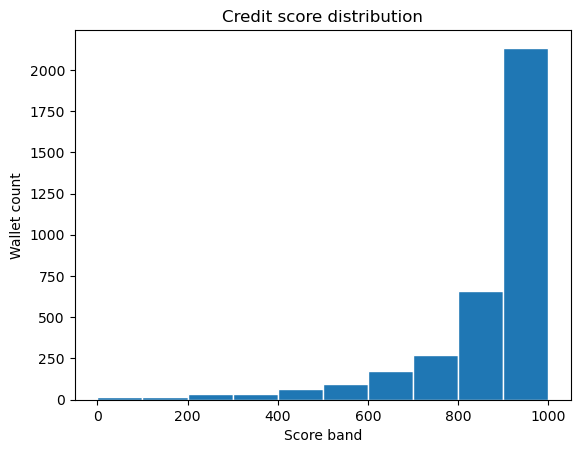

In [8]:
bins = range(0,1100,100)
plt.hist(features["credit_score"], bins=bins, edgecolor="white")
plt.title("Credit score distribution")
plt.xlabel("Score band")
plt.ylabel("Wallet count")
plt.savefig("score_distribution.png", dpi=150, bbox_inches="tight")
plt.show()


In [9]:
features[["wallet","credit_score"]].to_csv("wallet_scores.csv", index=False)
print("Saved wallet_scores.csv  ")


Saved wallet_scores.csv  
